# Recommender Systems with Python

Welcome to the code notebook for Recommender Systems with Python. In this notebook we will develop basic recommendation systems using Python and pandas.

In this notebook, we will focus on providing a basic recommendation system by suggesting items that are most similar to a particular item, in this case, movies. Keep in mind, this is not a true robust recommendation system, to describe it more accurately,it just tells you what movies/items are most similar to your movie choice.
Let's get started!

In [1]:
import numpy as np
import pandas as pd

## Getting Data

In [2]:
column_name = ['user_id', 'item_id','rating','timestamp']

In [3]:
df = pd.read_csv('u.data', sep='\t', names = column_name)

In [4]:
# Let's check the head

df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


Now let's get the movie titles:

In [5]:
movie_titles = pd.read_csv('Movie_Id_Titles')

In [6]:
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


**As we can see, both the Dataframe 'df' & 'movie_titles' has common column 'item_id, so we can merge them both**

In [7]:
df = pd.merge(df,movie_titles,on='item_id')

In [8]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


# EDA
Let’s explore the data a bit and get a look at some of the best rated movies.
## Visualization Imports

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('white')

In [10]:
# Let's see top average high rated movies

df.groupby('title')['rating'].mean().sort_values(ascending=False).head(15)

# ascending = False because we need the rating in descending order, from High to Low

title
They Made Me a Criminal (1939)                       5.000
Marlene Dietrich: Shadow and Light (1996)            5.000
Saint of Fort Washington, The (1993)                 5.000
Someone Else's America (1995)                        5.000
Star Kid (1997)                                      5.000
Great Day in Harlem, A (1994)                        5.000
Aiqing wansui (1994)                                 5.000
Santa with Muscles (1996)                            5.000
Prefontaine (1997)                                   5.000
Entertaining Angels: The Dorothy Day Story (1996)    5.000
Pather Panchali (1955)                               4.625
Some Mother's Son (1996)                             4.500
Maya Lin: A Strong Clear Vision (1994)               4.500
Anna (1996)                                          4.500
Everest (1998)                                       4.500
Name: rating, dtype: float64

In [11]:
# Now let's check movies with most rated

df.groupby('title')['rating'].count().sort_values(ascending=False).head(7)

title
Star Wars (1977)               584
Contact (1997)                 509
Fargo (1996)                   508
Return of the Jedi (1983)      507
Liar Liar (1997)               485
English Patient, The (1996)    481
Scream (1996)                  478
Name: rating, dtype: int64

In [12]:
# let's put this all on a DataFrame

ratings = pd.DataFrame(df.groupby('title')['rating'].mean())

In [13]:
ratings

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390
...,...
Young Guns II (1990),2.772727
"Young Poisoner's Handbook, The (1995)",3.341463
Zeus and Roxanne (1997),2.166667


In [14]:
# Now let's get the count of ratings for every title

ratings['num of rating'] = pd.DataFrame(df.groupby('title')['rating'].count())

In [15]:
ratings.head()

,rating,num of rating
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


Let's go for some Histograms

<AxesSubplot:>

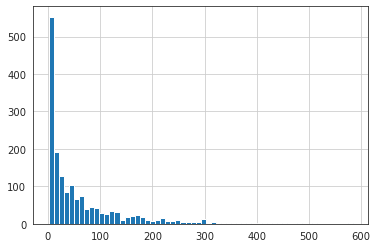

In [17]:
ratings['num of rating'].hist(bins=60)

<AxesSubplot:>

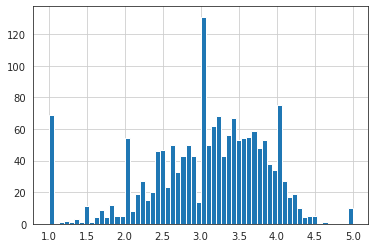

In [18]:
ratings['rating'].hist(bins=60)

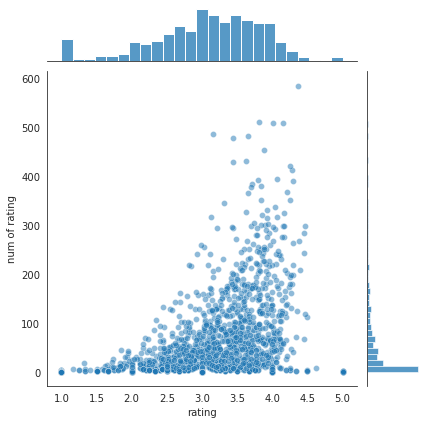

In [19]:
# Relation between ratings and num_of_ratings

sns.jointplot(x= 'rating', y= 'num of rating', data = ratings, alpha = 0.5)

# Recommending Similar Movies

Let's create a matrix that has the user ids on one access and the movie title on another axis. Each cell will then consist of the rating the user gave to that movie. Note there will be a lot of NaN values, because most people have not seen most of the movies.

In [22]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [23]:
moviemat = df.pivot_table(index='user_id', columns='title',values='rating')

In [31]:
moviemat.tail()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
942,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
943,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.0,3.0,NaN,NaN,NaN,NaN


In [32]:
# Checking some of the most rated movies

ratings.sort_values('num of rating',ascending=False).head(13)

,rating,num of rating
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


Let's choose two movies: starwars, a sci-fi movie. And Liar Liar, a comedy.

In [33]:
starwars_user_ratings = moviemat['Star Wars (1977)']
liarliar_user_ratings = moviemat['Liar Liar (1997)']

In [37]:
starwars_user_ratings.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [38]:
liarliar_user_ratings.head()

user_id
0    NaN
1    NaN
2    1.0
3    2.0
4    5.0
Name: Liar Liar (1997), dtype: float64

We can then use corrwith() method to get correlations between two pandas series:

In [41]:
similar_to_starwars = moviemat.corrwith(starwars_user_ratings)
similar_to_liarliar = moviemat.corrwith(liarliar_user_ratings)

/home/meghost/Anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/meghost/Anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/home/meghost/Anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/meghost/Anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [46]:
similar_to_starwars.tail()

title
Young Guns II (1990)                     0.228615
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.723123
Á köldum klaka (Cold Fever) (1994)            NaN
dtype: float64

Let’s clean this by removing NaN values and using a DataFrame instead of a series:

In [60]:
corr_starwars = pd.DataFrame(similar_to_starwars,columns=['Correlation'])
corr_starwars.dropna(inplace=True)

In [61]:
corr_starwars

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
...,...
Young Guns (1988),0.186377
Young Guns II (1990),0.228615
"Young Poisoner's Handbook, The (1995)",-0.007374


Now if we sort the dataframe by correlation, we should get the most similar movies, however note that we get some results that don’t really make sense. This is because there are a lot of movies only watched once by users who also watched star wars (it was the most popular movie).

In [62]:
corr_starwars.sort_values('Correlation', ascending=False)

,Correlation
title,
Hollow Reed (1996),1.0
Stripes (1981),1.0
Star Wars (1977),1.0
Man of the Year (1995),1.0
"Beans of Egypt, Maine, The (1994)",1.0
...,...
For Ever Mozart (1996),-1.0
Frankie Starlight (1995),-1.0
I Like It Like That (1994),-1.0


Let’s fix this by filtering out movies that have less than 100 reviews (this value was chosen based off the histogram from earlier).

In [63]:
corr_starwars = corr_starwars.join(ratings['num of rating'])

# Both join and merge can be used to combine two dataframes but the join method combines two dataframes on the basis of their indexes/indices whereas the merge method is more versatile and allows us to specify columns beside the index to join on for both dataframes.

In [64]:
corr_starwars.head()

,Correlation,num of rating
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [65]:
# Let's filter out the movies with less than or equal to 100 rating

corr_starwars[corr_starwars['num of rating']>100].sort_values('Correlation',ascending=False).head(13)

,Correlation,num of rating
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
"Sting, The (1973)",0.367538,241
Indiana Jones and the Last Crusade (1989),0.350107,331
Pinocchio (1940),0.347868,101
"Frighteners, The (1996)",0.332729,115


Now the same for the comedy Liar Liar:

In [77]:
# Creating the DataFrame
corr_liarliar = pd.DataFrame(similar_to_liarliar,columns=['Correlation'])

# Dropping Nan values
corr_liarliar.dropna(inplace=True)

# Joining with Number of Ratings
corr_liarliar=corr_liarliar.join(ratings['num of rating'])

# Filtering out movies with less than or equal to 100 ratings
# Sorting values based of 'number of rating' column
corr_liarliar[corr_liarliar['num of rating'] > 93].sort_values('num of rating',ascending=False)

,Correlation,num of rating
title,,
Star Wars (1977),0.150292,584
Contact (1997),0.022878,509
Fargo (1996),-0.110496,508
Return of the Jedi (1983),0.227837,507
Liar Liar (1997),1.000000,485
...,...,...
Fierce Creatures (1997),0.244302,96
Jumanji (1995),0.226695,96
Breakfast at Tiffany's (1961),-0.087796,95


pandas.core.series.Series

# Great Job